In [1]:
import pandas as pd 
returnsant=pd.read_csv('returnsant.csv')

In [2]:
returnsant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perf_date                         195 non-null    object 
 1   Hedge Fund                        195 non-null    float64
 2   Factor - Low Risk                 195 non-null    float64
 3   Factor - Value vs Growth          195 non-null    float64
 4   Factor - Fixed Income Carry       195 non-null    float64
 5   Factor - Local Equity             195 non-null    float64
 6   Factor - Trend Following          195 non-null    float64
 7   Factor - Commodities              195 non-null    float64
 8   Factor - Equity                   195 non-null    float64
 9   Factor - Foreign Exchange Carry   195 non-null    float64
 10  Factor - Small Cap                195 non-null    float64
 11  Factor - Emerging Markets         195 non-null    float64
 12  Factor -

In [3]:
returnsant.describe()

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,150.222145,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,165.289979,0.002219,0.005333,0.006526
std,0.029623,0.028541,2569.592857,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,1725.936406,0.009019,0.032067,0.015723
min,-0.096051,-0.128207,-12739.631010,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.015540,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.008800,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.001267,0.007850,0.007147
75%,0.028000,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.009257,0.007310,0.024615,0.014936
max,0.087900,0.076999,31963.201490,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,23213.711040,0.028112,0.124979,0.084840


In [4]:
hedgefund=returnsant['Hedge Fund']

In [5]:
hedgefund.isnull().sum()

0

<AxesSubplot:>

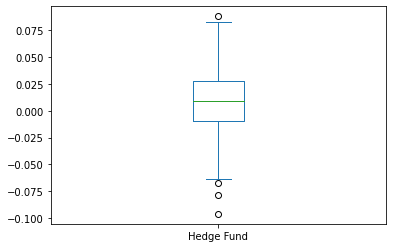

In [6]:
hedgefund.plot(kind='box')

# ~ LogN(0,1) skewed towards the right
# Now we consider its seasonality and stationarity
# Decomposotion will be performed to see if ADF test is able to 
# disect the seasonality


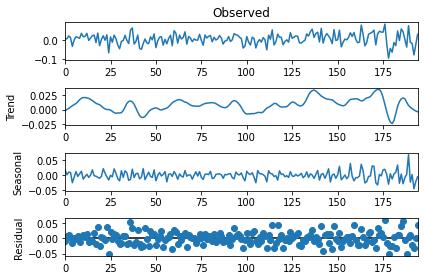

In [7]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
res = STL(hedgefund.values.reshape(-1,1),period=6).fit()
res.plot()
plt.show()

In [8]:
res?

Type:        DecomposeResult
String form: <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f9c13450640>
File:        ~/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py
Docstring:  
Results class for seasonal decompositions

Parameters
----------
observed : array_like
    The data series that has been decomposed.
seasonal : array_like
    The seasonal component of the data series.
trend : array_like
    The trend component of the data series.
resid : array_like
    The residual component of the data series.
weights : array_like, optional
    The weights used to reduce outlier influence.


In [9]:
season=pd.Series(res.seasonal)
trendy=pd.Series(res.trend)
regress=hedgefund -season- trendy


In [10]:
regress

0     -0.008090
1      0.006571
2      0.011667
3      0.001066
4     -0.014368
         ...   
190    0.008765
191   -0.021046
192   -0.033156
193    0.001417
194    0.041312
Length: 195, dtype: float64

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


,pvalue
original,8.511384e-20
regress,1.114713e-11
seasonfirstdiff,2.544166e-20
firstdiffhedge,4.229823e-13
secdiffhedge,1.968606e-12
standardhedge,4.436187e-23


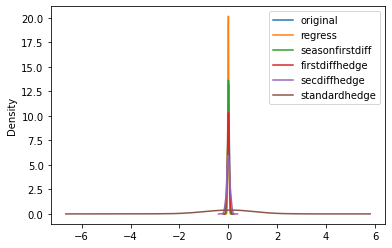

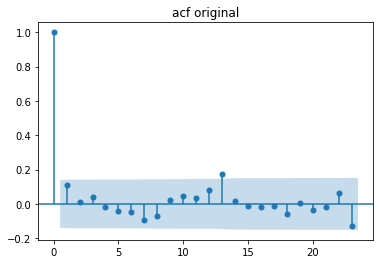

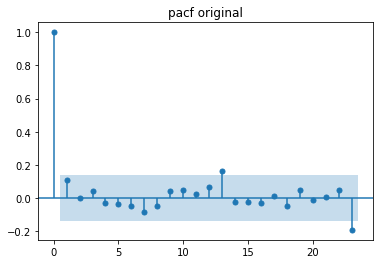

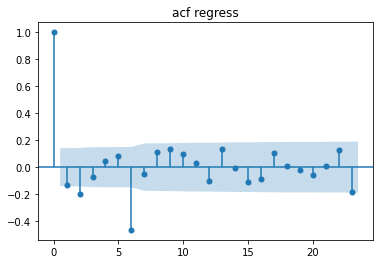

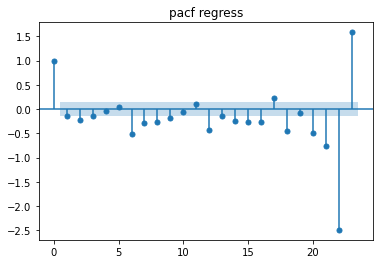

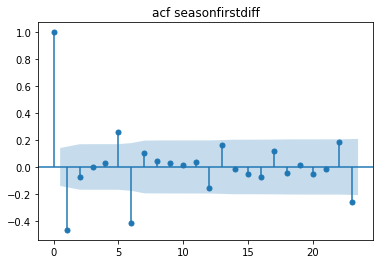

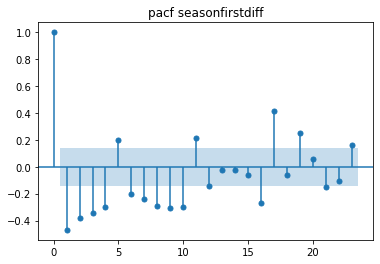

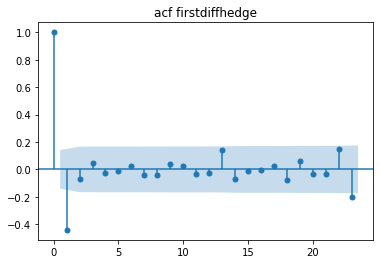

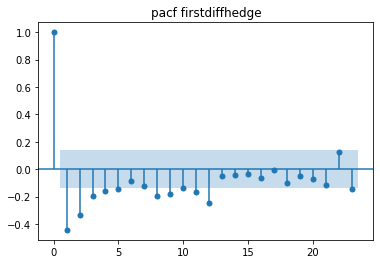

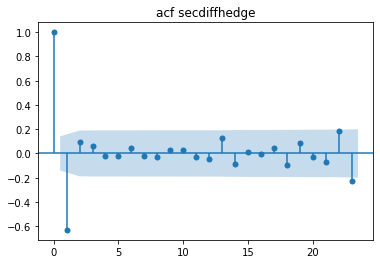

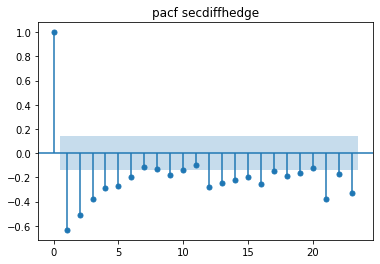

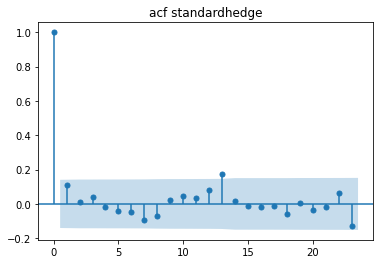

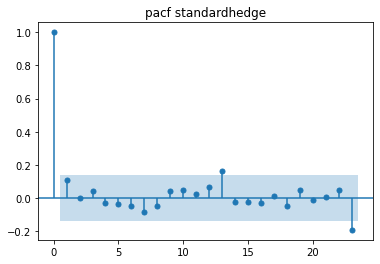

In [44]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import *
from scipy import stats
import numpy as np
fig,ax=plt.subplots()
#loghedge=pd.DataFrame(np.log(hedgefund.values))
seasonfirstdiff=regress.diff().dropna()
firstdiffhedge=hedgefund.diff().dropna()
secdiffhedge=firstdiffhedge.diff().dropna()
standardhedge=pd.DataFrame(StandardScaler().fit_transform(hedgefund.values.reshape(-1,1)))
hedgeplusthree=hedgefund + 3
#boxcoxhedge=pd.DataFrame(stats.boxcox((hedgeplusthree.values)))
loghedge=pd.DataFrame(np.log(hedgeplusthree.values.reshape(-1,1)))
exphedge=pd.DataFrame(np.exp(hedgefund.values.reshape(-1 , 1)))
transformed=[hedgefund,regress,seasonfirstdiff,firstdiffhedge,secdiffhedge,standardhedge]
transnames=['original','regress','seasonfirstdiff','firstdiffhedge','secdiffhedge','standardhedge']

hedgefund.plot(kind='kde',ax=ax)
plot_acf(hedgefund.values,title='acf '+transnames[0])
plot_pacf(hedgefund.values,title='pacf '+transnames[0])

regress.plot(kind='kde',ax=ax)
plot_acf(regress.values,title='acf '+transnames[1])
plot_pacf(regress.values,title='pacf '+transnames[1])

seasonfirstdiff.plot(kind='kde',ax=ax)
plot_acf(seasonfirstdiff.values,title='acf '+transnames[2])
plot_pacf(seasonfirstdiff.values,title='pacf '+transnames[2])

firstdiffhedge.plot( kind='kde',ax=ax)
plot_acf(firstdiffhedge.values,title='acf '+transnames[3])
plot_pacf(firstdiffhedge.values,title='pacf '+transnames[3])

secdiffhedge.plot( kind='kde',ax=ax)
plot_acf(secdiffhedge.values,title='acf '+transnames[4])
plot_pacf(secdiffhedge.values,title='pacf '+transnames[4])

standardhedge.plot( kind='kde',ax=ax)
plot_acf(standardhedge.values,title='acf '+transnames[5])
plot_pacf(standardhedge.values,title='pacf '+transnames[5])

#loghedge.plot(kind='kde',ax=ax)
#plot_acf(loghedge.values,title='acf '+transnames[6])
#plot_pacf(loghedge.values,title='pacf '+transnames[6])

#exphedge.plot(kind='kde',ax=ax)
#plot_acf(exphedge.values,title='acf '+transnames[7])
#plot_pacf(exphedge.values,title='pacf '+transnames[7])


print()
ax.legend(transnames)

adfres=[]
missingvalexp=[]
for t,transname in zip(transformed,transnames):
    missingvalexp.append(t.isnull().sum())
    
    if transname=='original':
        adfres.append(adfuller(t.dropna().values.reshape(-1,1),regression='ct')[1])
    elif (transname=='regress')|(transname=='seasonfirstdiff'):
         adfres.append(adfuller(t.dropna().values.reshape(-1,1),regression='nc')[1])
    else:
        adfres.append(adfuller(t.dropna().values.reshape(-1,1))[1])
        continue
#missingvalexp=np.array(missingvalexp).reshape(len(transnames),1,dtype='O')
adfres=np.array(adfres).reshape(len(transnames),1)
adfrespd=pd.DataFrame(adfres)
#adfrespd['Stationary Values BOOL']=
#adfrespd['Missing Values BOOL']=missingvalexp
adfrespd.index=transnames
adfrespd.columns=['pvalue']
adfrespd.head(len(transnames))
#boxcoxhedge.plot(kind='kde',axis=ax)

In [12]:
import pmdarima as pm


y_train=hedgefund.values.reshape(-1,1)[0:184]
y_test=hedgefund.values.reshape(-1,1)[184:194]

mlist=[1,4,12]
for m in mlist:
    stepwise_fit = pm.auto_arima(y_train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=m,
                             start_P=0, seasonal=True,
                             d=0, D=0, trace=True,
                             error_action='trace',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to s
    stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-782.595, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-784.142, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-784.585, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-784.603, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-770.037, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-782.615, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-780.612, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-773.948, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.375 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[4] intercept   : AIC=-781.196, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=-784.142, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=-783.131, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=-783.230, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=-77

In [38]:
mod=pm.arima.ARIMA((1,2,1),(0,0,0,0),trace=True )
mod.fit(y_train)

ARIMA(order=(1, 2, 1))

In [29]:
from pmdarima.preprocessing import BoxCoxEndogTransformer

In [30]:
boxcoxh=BoxCoxEndogTransformer().fit_transform(hedgefund.values.reshape(-1,1)+1)

In [31]:
boxcoxh=np.array(boxcoxh)

/var/folders/7f/gmpqnwqx0lb4nrsz2vqhvgn40000gp/T/ipykernel_75916/74375774.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  boxcoxh=np.array(boxcoxh)


<AxesSubplot:ylabel='Density'>

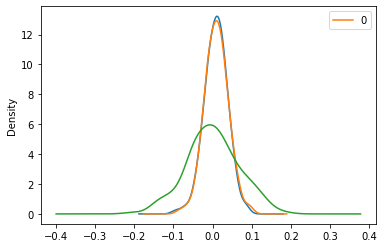

In [32]:
fig,ax=plt.subplots()
hedgefund.plot(kind='kde')
pd.DataFrame(boxcoxh[0]).plot(kind='kde',ax=ax)
secdiffhedge.plot(kind='kde')

In [33]:
adfuller(boxcoxh[0])[1]

2.332933187381792e-23

In [34]:
adfuller(secdiffhedge.values.reshape(-1,1))[1]

1.968605894740855e-12

In [39]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = mod # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean squared error: 0.0027725847386295068
SMAPE: 150.2096224358861


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


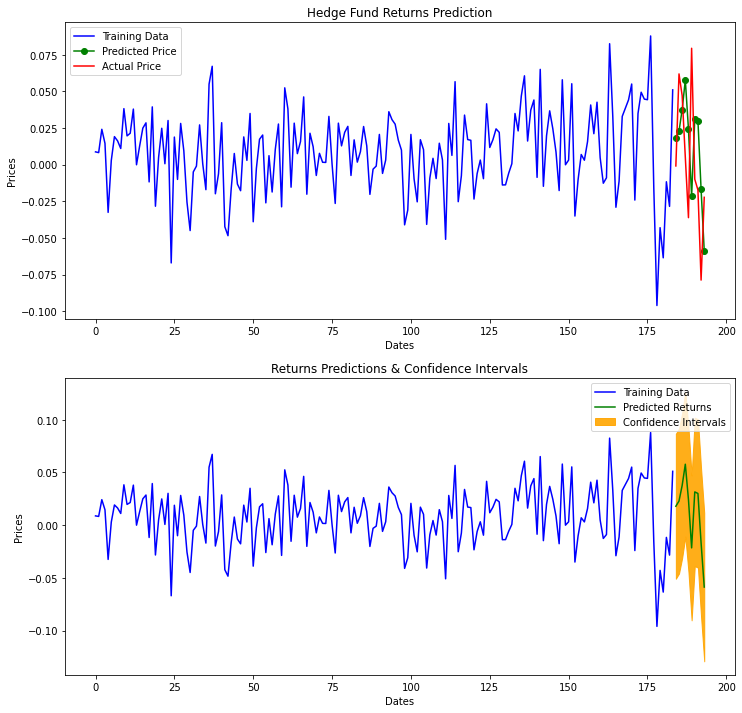

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
axes[0].plot(y_train, color='blue', label='Training Data')
axes[0].plot(hedgefund.index[184:194], forecasts, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(hedgefund.index[184:194], y_test, color='red', label='Actual Price')
axes[0].set_title('Hedge Fund Returns Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')

axes[0].legend()
axes[0].legend()


# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(y_train, color='blue', label='Training Data')
axes[1].plot(hedgefund.index[184:194], forecasts, color='green',
             label='Predicted Returns')

axes[1].set_title('Returns Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(hedgefund.index[184:194],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")


axes[1].legend()

In [49]:
var=mod.resid()**2
# package does this in statsmodels they know we are dumb and forgetful

In [53]:
from statsmodels.stats.diagnostic import het_breuschpagan as bp
bp(mod.resid(),hedgefund.values[0:194].reshape(-1,1))
# clearly by the F test W high sig is not heterosckedastic 

(0.014436858995295232, nan, 0.0143635110828604, 0.904728327461191)

<AxesSubplot:ylabel='Density'>

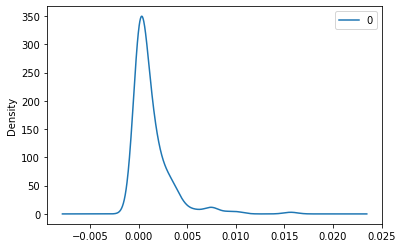

In [51]:
pd.DataFrame(var).plot(kind='kde')

In [54]:
from statsmodels.stats.stattools import durbin_watson as db
db(mod.resid())

2.333350992241506